# Business Case: Based on the given features we need to predict the flight ticket price.

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the data
data = pd.read_excel('Flight_Fare.xlsx')
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Domain Analysis:

#### 1) Airlines:
An organization providing a regular public service of air transport on one or more routes.The service enables travellers to search the flight schedules of multiple airlines.This column contains all the types of airlines like Indigo, Jet Airways, Air India, and many more.

#### 2) Date_of_Journey:
This column will let us know about the date on which the passenger’s journey will start. 

#### 3) Source:
This column holds the name of the place from where the passenger’s journey will start.

#### 4) Destination:
This column contains the name of the place to where passengers wanted to travel.

#### 5) Route:
In this column we can know about what the route is through which passengers have opted to travel from his/her source to their destination.

#### 6) Dep_Time:
The Time when the plane leaves the airport.

#### 7) Arrival_Time:
Arrival time is when the passenger will reach his/her destination.

#### 8) Duration:
Duration is the whole period that a flight will take to complete its journey from source to destination.

#### 9) Total_Stops:
This feature will let us know in how many places flights will stop between the source and destination in the whole journey.

#### 10) Additional_Info: 
In this column, we will get information about food, kind of food, and other amenities.

#### 11) Price: 
Price of the flight for a complete journey including all the expenses before onboarding.

## Basic Checks

In [3]:
#Getting the first five rows
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
#Getting the last five rows
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
data.shape

(10683, 11)

In [7]:
#Used to view some basic statistical details like percentile,mean,std etc.
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
#It will give you info about categorical data/columns
data.describe(include = ['O'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [9]:
#To check data type and null values for all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## Exploratory Data Analysis

## Univariate Analysis

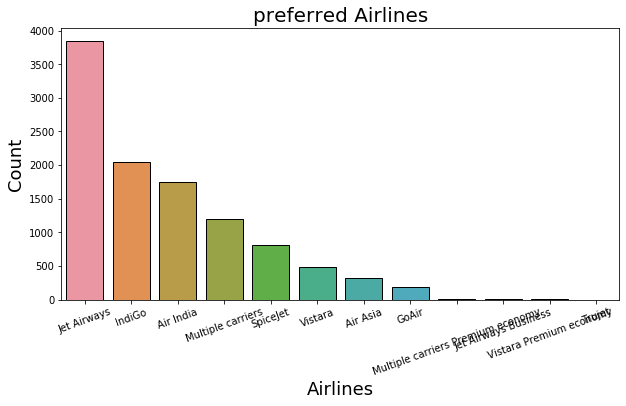

In [5]:
plt.figure(figsize = (10, 5))
sns.countplot(data = data,x = 'Airline',order = data['Airline'].value_counts().index, ec = 'black')
plt.title('preferred Airlines', fontsize = 20, color = 'black')
plt.xlabel('Airlines', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation = 20)
plt.show()

## Insights

- The most preferred Airlines is Jet Airways.
- The least preffered Airlines is Trujet.

### Bar chart showing the most preferred source

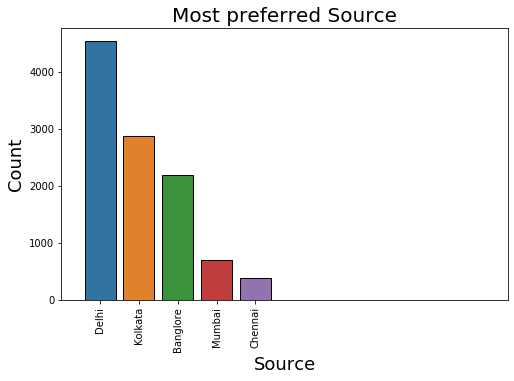

In [5]:
plt.figure(figsize = (8, 5))
sns.countplot(x = 'Source', data = data, order = data['Source'].value_counts().index, ec = 'black')
plt.title('Most preferred Source',fontsize = 20, color = 'black') 
plt.xlabel('Source', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation = 90)
plt.xlim(-1, 10.5)
plt.show()

## Insights

- This countplot explains the name of the cities from where most of the passenger journey will begin.
- The most preferred source is Delhi which has a count more than 4000.
- Least preferred source is Chennai.

### Bar chart showing the most preferred Destination

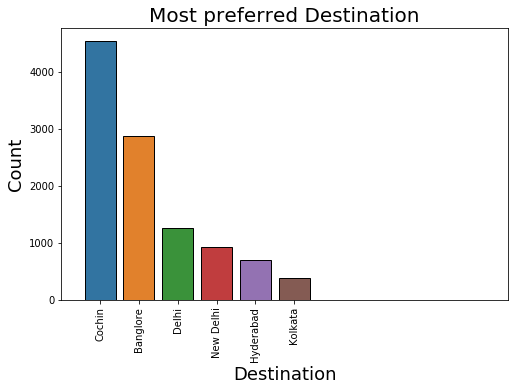

In [6]:
plt.figure(figsize = (8,5))
sns.countplot(x = 'Destination', data = data, order = data['Destination'].value_counts().index, ec = 'black')
plt.title('Most preferred Destination', fontsize = 20, color = 'black')
plt.xlabel('Destination', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation = 90)
plt.xlim(-1, 10.5)
plt.show()

## Insights

- This countplot explains about the most preferred Destination.
- The most preferred destination is Cochin which have count more than 4000.
- The least preferred destination one is Kolkata.

### Bar chart showing top 30 most preferred Route

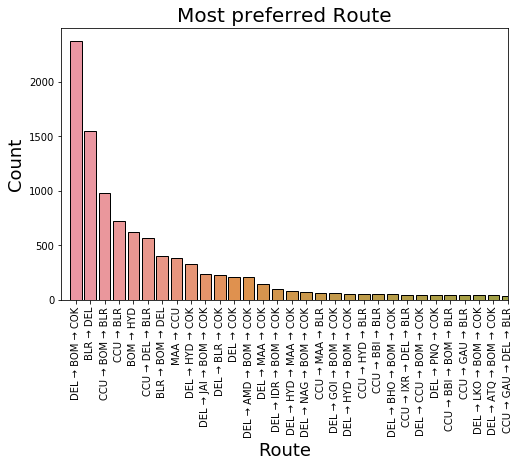

In [7]:
plt.figure(figsize = (8, 5))
sns.countplot(x = 'Route', data = data, order = data['Route'].value_counts().index, ec = 'black')
plt.title('Most preferred Route', fontsize = 20, color = 'black')
plt.xlabel('Route', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation = 90)
plt.xlim(-1, 30)
plt.show()

## Insights

- The most preferred route is DEL→BOM→COK.
- The least preferred route is CCU→GAU→DEL→BLR

## Numerical Data:

In [9]:
#Creating a new dataframe with numerical variables only
data1 = data[['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops']]
data1

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops
0,24/03/2019,22:20,01:10 22 Mar,2h 50m,non-stop
1,1/05/2019,05:50,13:15,7h 25m,2 stops
2,9/06/2019,09:25,04:25 10 Jun,19h,2 stops
3,12/05/2019,18:05,23:30,5h 25m,1 stop
4,01/03/2019,16:50,21:35,4h 45m,1 stop
...,...,...,...,...,...
10678,9/04/2019,19:55,22:25,2h 30m,non-stop
10679,27/04/2019,20:45,23:20,2h 35m,non-stop
10680,27/04/2019,08:20,11:20,3h,non-stop
10681,01/03/2019,11:30,14:10,2h 40m,non-stop


- As we observe the graphs dataset is large and it contains 10,683 rows.
- So Departure time, Arrival Time and Duration contains large number of unique values as each passengers travels in different time according to their preferences.
- Because of this the x labelling is getting overlapped and we are not getting the correct insights by this graph.
- Whereas the Date of journey and total stops have less unique value and the plotting becomes easier and we have obtained insights from those.

### Histplot showing about the Most preferred Date of Journey

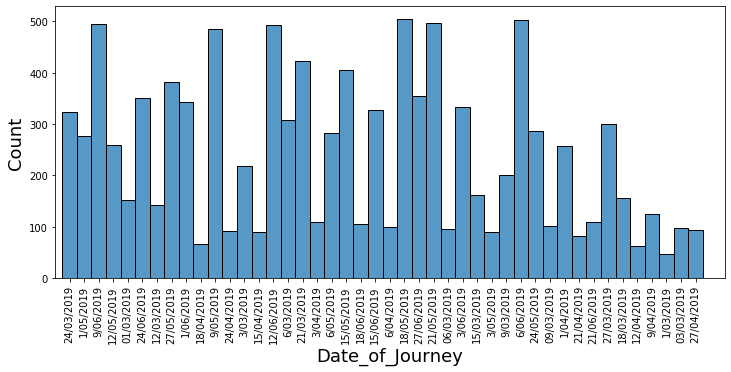

In [6]:
plt.figure(figsize = (12, 5))
sns.histplot(x = 'Date_of_Journey', data = data, ec = 'black')
plt.xlabel('Date_of_Journey', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation = 90)
plt.xlim(-1, 45)
plt.show()

## Insights

- Passengers travelled often on 18/05/2019 and 6/06/2019.
- The least count of passengers travelled is on 1/03/2019.

### Histplot showing about the count of the Total Stops

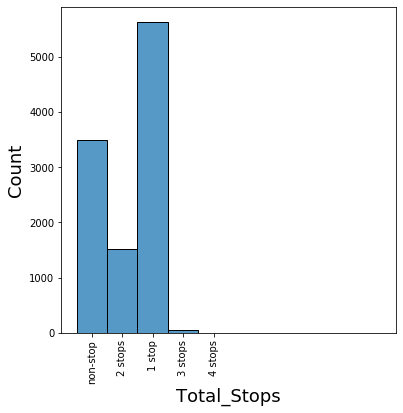

In [12]:
plt.figure(figsize = (6, 6))
sns.histplot(x = 'Total_Stops', data = data, ec = 'black')
plt.xlabel('Total_Stops', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation = 90)
plt.xlim(-1, 10)
plt.show()

## Insights

- The count of the 1 stop is the highest.
- Passengers prefer non-stop because it save time.
- The least count of total stops is 4 stops.

## Bivariate Analysis

### Airline Vs Flight Ticket Price

In [13]:
airlines = data.groupby('Airline').Price.max()
airlines_df = airlines.to_frame().sort_values('Price', ascending = False)
airlines_df

,Price
Airline,
Jet Airways Business,79512
Jet Airways,54826
Multiple carriers,36983
Air India,31945
SpiceJet,23267
GoAir,22794
IndiGo,22153
Vistara,21730
Multiple carriers Premium economy,14629


## Insights

- Jet Airways cost is high ed to other Arlines.
- Trujet cost is less compared all other Airlines.






### Bar plot showing Airline company Vs Flight Ticket Price

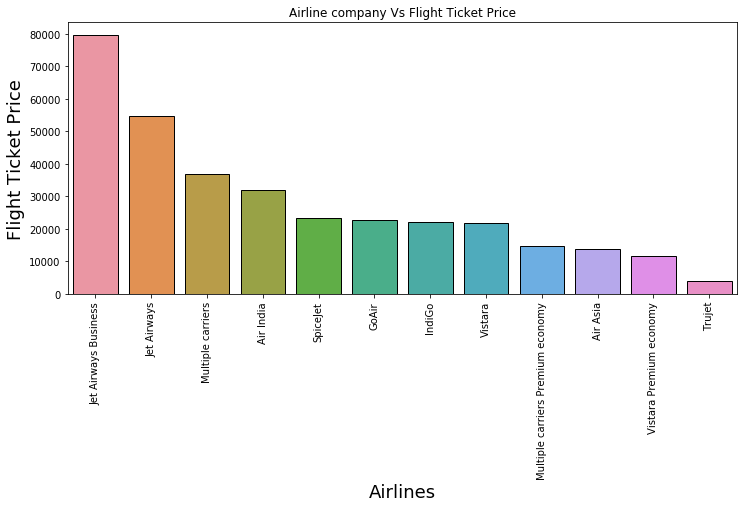

In [14]:
plt.subplots(figsize = (12, 5))
sns.barplot(x = airlines_df.index,y = airlines_df['Price'], ec = 'black')
plt.title('Airline company Vs Flight Ticket Price')
plt.xlabel('Airlines', fontsize = 18)
plt.ylabel('Flight Ticket Price', fontsize = 18)
plt.xticks(rotation = 90)
plt.show()

## Insights

- From the above graph we have observed that Jet Airways Business is the Costliest.
- The cheapest Airlines is Trujet and the price is 1759(approx).
- The Jet Airways Business ticket price is above 70000.

In [22]:
data.Price.min()

1759

In [8]:
data.Price.min()

1759

In [23]:
data.Price.max()

79512

### Price on Weekdays Vs Price on Weekends

In [16]:
days_df = data[['Airline', 'Date_of_Journey', 'Price']]
days_df.head()

,Airline,Date_of_Journey,Price
0,IndiGo,24/03/2019,3897
1,Air India,1/05/2019,7662
2,Jet Airways,9/06/2019,13882
3,IndiGo,12/05/2019,6218
4,IndiGo,01/03/2019,13302


In [17]:
days_df['Date_of_Journey'] = pd.to_datetime(days_df['Date_of_Journey'], format = '%d/%m/%Y')
days_df['Weekday'] = days_df['Date_of_Journey'].dt.day_name()
days_df['Weekend'] = days_df['Weekday'].apply(lambda day:1 if day == 'Sunday' else 0)
days_df.head()

,Airline,Date_of_Journey,Price,Weekday,Weekend
0,IndiGo,2019-03-24,3897,Sunday,1
1,Air India,2019-05-01,7662,Wednesday,0
2,Jet Airways,2019-06-09,13882,Sunday,1
3,IndiGo,2019-05-12,6218,Sunday,1
4,IndiGo,2019-03-01,13302,Friday,0


### Barplot showing the Price on Weekdays Vs Weekends

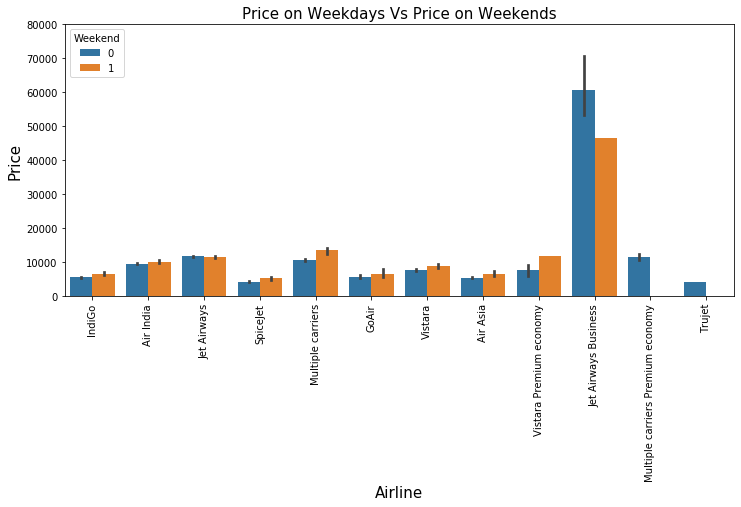

In [18]:
plt.subplots(figsize = (12, 5))
sns.barplot(x = 'Airline', data = days_df, y = 'Price', hue = 'Weekend')
plt.title('Price on Weekdays Vs Price on Weekends', fontsize = 15, color = 'black')
plt.xlabel('Airline', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.xticks(rotation = 90)
plt.ylim(0, 80000)
plt.show()

## Insights

- Jet Airways Business, Multiple carriers premium economy and Trujet airlines have less ticket Price on Weekdays and other airlines have higher ticket price on Weekend.
- Mejority in weekends price of Airlines tickets is high.

# Data Preprocessing

## Feature Engineering

In [30]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [19]:
#Extracting date, month and year from Date_of_Journey feature and store them in new columns.
data['Journey_date'] = data['Date_of_Journey'].str.split('/').str[0].astype(int)
data['Journey_month'] = data['Date_of_Journey'].str.split('/').str[1].astype(int)
data['Journey_year'] = data['Date_of_Journey'].str.split('/').str[2].astype(int)

In [20]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [9]:
#After Extracting data from Date_of_Journey we are dropping Date_of_Journey column.
data = data.drop(['Date_of_Journey'], axis = 1)

In [22]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [24]:
#Since Journey_year is uique to all rows and we can drop it.
data = data.drop(['Journey_year'], axis = 1)

In [25]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [26]:
data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [27]:
#Total_Stops
data['Total_Stops'] = data['Total_Stops'].str.split(' ').str[0]
data['Total_Stops'] = data['Total_Stops'].replace('non-stop','0')

In [28]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,3


In [29]:
#Extracting hours and minutes from the Arrival_Time
data['Arrival_Time'] = data['Arrival_Time'].str.split(' ').str[0]
data['Arrival_hour'] = data['Arrival_Time'].str.split(':').str[0].astype(int)
data['Arrival_min'] = data['Arrival_Time'].str.split(':').str[1].astype(int)
data = data.drop(['Arrival_Time'], axis = 1)

In [30]:
#Extracting hours and minutes from the Departure_Time
data['Dep_Time'] = data['Dep_Time'].str.split(' ').str[0]
data['Dep_hour'] = data['Dep_Time'].str.split(':').str[0].astype(int)
data['Dep_min'] = data['Dep_Time'].str.split(':').str[1].astype(int)
data = data.drop(['Dep_Time'], axis = 1)

In [31]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,21,35,16,50


In [32]:
data.Additional_Info.value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

### Route Column

- The Route column tells about the journey's path.
- Route column can be removed because Total_Stops feature already captured this values and both are related.
- Additional_info can also be dropped since more that 70% have no-info.

In [33]:
data.drop(['Route', 'Additional_Info'], axis = 1, inplace = True)

In [34]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,21,35,16,50


### Duration column

- Extract hours and min from the Duration feature.
- convert hours to minute and find the total duration in minutes and make it a separate column.

In [35]:
data['Duration_hr'] = data['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [36]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,21,35,16,50,4


In [37]:
data['Duration_min'] = data['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [38]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,21,35,16,50,4,45


In [39]:
data['Duration_min'].fillna('0', inplace = True)

In [40]:
data['Duration_hr'].str.contains('h').sum()

0

In [41]:
data['Duration_hr'].str.contains('m').sum()

1

In [42]:
data['Duration_min'].str.contains('h').sum()

0

In [43]:
data['Duration_min'].str.contains('m').sum()

0

In [44]:
data[data['Duration_hr'].str.contains('m')]

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
6474,Air India,Mumbai,Hyderabad,5m,2,17327,6,3,16,55,16,50,5m,0


In [45]:
data.loc[[6474], 'Duration_min']=data.loc[[6474], 'Duration_hr']
data.loc[data['Duration_min']=='5m', 'Duration_min']=5

In [46]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,21,35,16,50,4,45


In [47]:
data['Duration_hr'] = data['Duration_hr'].replace('5m', '0')

In [48]:
data['Duration_hr'].str.contains('m').sum()

0

In [49]:
data[data['Duration_hr'].str.contains('m')]

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min


In [50]:
data['Duration_hr'] = data['Duration_hr'].astype(int)

In [51]:
data['Duration_min'] = data['Duration_min'].astype(int)

In [52]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,21,35,16,50,4,45


In [53]:
data['Duration'] = (data['Duration_hr'] * 60) + (data['Duration_min'])
data = data.drop(['Duration_hr', 'Duration_min'], axis = 1)

In [54]:
data.head(6475)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,170,0,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,445,2,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1,13302,1,3,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...
6470,Multiple carriers Premium economy,Delhi,Cochin,725,1,9845,21,3,21,0,8,55
6471,IndiGo,Banglore,Delhi,165,0,4077,1,5,4,15,1,30
6472,Multiple carriers,Delhi,Cochin,690,1,9315,21,5,19,0,7,30
6473,Jet Airways,Kolkata,Banglore,570,1,14781,9,5,23,35,14,5


## Checking the null values

In [55]:
data.isnull().sum()

Airline          0
Source           0
Destination      0
Duration         0
Total_Stops      1
Price            0
Journey_date     0
Journey_month    0
Arrival_hour     0
Arrival_min      0
Dep_hour         0
Dep_min          0
dtype: int64

In [56]:
data['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [57]:
data.dtypes

Airline          object
Source           object
Destination      object
Duration          int32
Total_Stops      object
Price             int64
Journey_date      int32
Journey_month     int32
Arrival_hour      int32
Arrival_min       int32
Dep_hour          int32
Dep_min           int32
dtype: object

In [58]:
# '1' is most frequently occuring value, so fill Total_Stops column null values by 1
data['Total_Stops'] = data['Total_Stops'].fillna('1')

In [59]:
data['total_Stops'] = data['Total_Stops'].astype(int)

In [60]:
data.isnull().sum()

Airline          0
Source           0
Destination      0
Duration         0
Total_Stops      0
Price            0
Journey_date     0
Journey_month    0
Arrival_hour     0
Arrival_min      0
Dep_hour         0
Dep_min          0
total_Stops      0
dtype: int64

## Converting the Categorical data into Numerical data

### Using Encoding to Handle the categorical data

**Features with categorical data**
- Airline
- Source
- Destination

Apply Lable Encoder to these features

In [61]:
for i in ['Airline', 'Source', 'Destination']:
    print(i, data[i].unique())
    print('-------------------------------------------------------------------')

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
-------------------------------------------------------------------
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
-------------------------------------------------------------------
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
-------------------------------------------------------------------


In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['Airline', 'Source', 'Destination']:
    data[i] = le.fit_transform(data[i])
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24/03/2019,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1,1/05/2019,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,4,9/06/2019,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,3,12/05/2019,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,3,01/03/2019,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [63]:
data

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,total_Stops
0,3,0,5,170,0,3897,24,3,1,10,22,20,0
1,1,3,0,445,2,7662,1,5,13,15,5,50,2
2,4,2,1,1140,2,13882,9,6,4,25,9,25,2
3,3,3,0,325,1,6218,12,5,23,30,18,5,1
4,3,0,5,285,1,13302,1,3,21,35,16,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,150,0,4107,9,4,22,25,19,55,0
10679,1,3,0,155,0,4145,27,4,23,20,20,45,0
10680,4,0,2,180,0,7229,27,4,11,20,8,20,0
10681,10,0,5,160,0,12648,1,3,14,10,11,30,0


## Feature Selection

In [64]:
data.corr()

,Airline,Source,Destination,Duration,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,total_Stops
Airline,1.000000,-0.013401,0.018479,-0.159803,-0.039520,0.026238,0.024643,-0.007491,-0.071089,-0.035194,-0.060044,-0.199411
Source,-0.013401,1.000000,-0.592574,0.161874,0.015998,0.004898,0.183268,0.025632,0.021040,0.059044,-0.056991,0.192840
Destination,0.018479,-0.592574,1.000000,-0.257365,-0.071112,-0.040998,-0.364686,-0.039710,0.017196,-0.072979,0.127892,-0.295481
Duration,-0.159803,0.161874,-0.257365,1.000000,0.506371,-0.022562,0.014870,0.051434,-0.069653,0.002001,-0.018938,0.738025
Price,-0.039520,0.015998,-0.071112,0.506371,1.000000,-0.153738,-0.103651,0.024264,-0.086155,0.006819,-0.024492,0.603883
Journey_date,0.026238,0.004898,-0.040998,-0.022562,-0.153738,1.000000,-0.038378,-0.003192,-0.017511,0.002220,-0.008261,-0.009472
Journey_month,0.024643,0.183268,-0.364686,0.014870,-0.103651,-0.038378,1.000000,-0.003941,-0.100626,0.039112,-0.059238,0.054389
Arrival_hour,-0.007491,0.025632,-0.039710,0.051434,0.024264,-0.003192,-0.003941,1.000000,-0.154362,0.005215,0.043054,0.038123
Arrival_min,-0.071089,0.021040,0.017196,-0.069653,-0.086155,-0.017511,-0.100626,-0.154362,1.000000,0.067909,-0.017594,-0.106939
Dep_hour,-0.035194,0.059044,-0.072979,0.002001,0.006819,0.002220,0.039112,0.005215,0.067909,1.000000,-0.024806,-0.061490


Text(0.5, 1, 'Heat map showing correlation between the features')

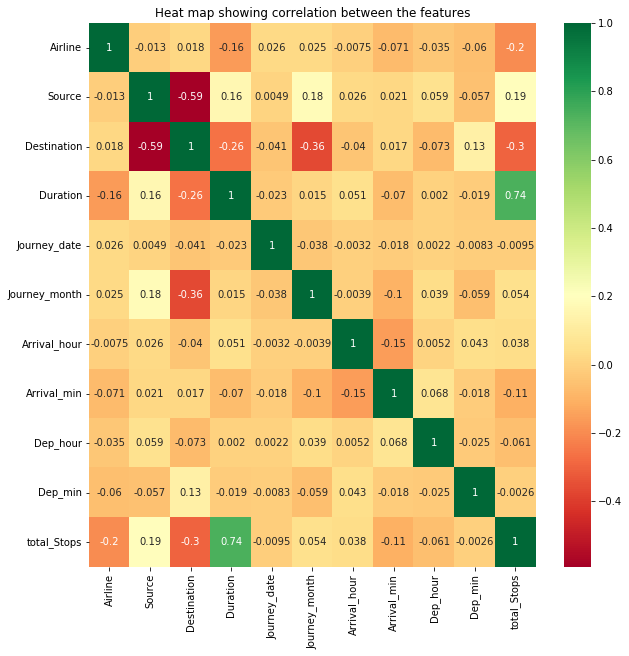

In [65]:
plt.figure(figsize = (10, 10))
sns.heatmap(data.drop('Price', axis = 1).corr(), annot = True, cmap = 'RdYlGn')
plt.title("Heat map showing correlation between the features")

### There is no correlation between the features.

# 1) Linear Regression

- **Linear Regression** is a **supervised** machine learning.
- And it is a **regression** problem.

## Model Creation

In [66]:
## Creating the independent variable
x = data.drop('Price', axis = 1)
x

,Airline,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,total_Stops
0,3,0,5,170,0,24,3,1,10,22,20,0
1,1,3,0,445,2,1,5,13,15,5,50,2
2,4,2,1,1140,2,9,6,4,25,9,25,2
3,3,3,0,325,1,12,5,23,30,18,5,1
4,3,0,5,285,1,1,3,21,35,16,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,150,0,9,4,22,25,19,55,0
10679,1,3,0,155,0,27,4,23,20,20,45,0
10680,4,0,2,180,0,27,4,11,20,8,20,0
10681,10,0,5,160,0,1,3,14,10,11,30,0


In [67]:
y = data.Price
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [69]:
x_train

,Airline,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,total_Stops
752,3,2,1,300,1,27,5,21,0,16,0,1
7431,8,1,4,135,0,6,5,10,35,8,20,0
5478,4,3,0,1495,1,12,6,19,50,18,55,1
3445,4,2,1,1015,1,6,6,4,25,11,30,1
9380,4,0,2,180,0,18,6,10,10,7,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,4,2,1,1165,1,27,3,4,25,9,0,1
5191,4,3,0,400,1,9,5,20,45,14,5,1
5390,6,2,1,760,1,15,5,1,30,12,50,1
860,3,0,5,165,0,3,3,3,25,0,40,0


In [70]:
x_test

,Airline,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,total_Stops
6076,4,3,0,750,1,18,5,18,15,5,45,1
3544,2,2,1,540,1,3,6,19,35,10,35,1
7313,4,3,0,345,1,1,5,19,50,14,5,1
5032,3,1,4,140,0,24,5,17,5,14,45,0
2483,4,2,1,335,1,21,5,4,25,22,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3022,4,0,5,365,1,18,3,23,0,16,55,1
8417,4,0,2,175,0,15,5,18,10,15,15,0
2605,3,0,2,170,0,21,6,3,15,0,25,0
1392,6,2,1,465,1,27,6,1,30,17,45,1


In [71]:
y_train

752      5054
7431     3911
5478    13044
3445    14714
9380     8016
        ...  
5734    12242
5191    10844
5390     7670
860      6144
7270    10262
Name: Price, Length: 8012, dtype: int64

In [72]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8012, 12)
(8012,)
(2671, 12)
(2671,)


In [73]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [74]:
y_pred = LR.predict(x_test)

In [75]:
y_pred

array([ 8583.40110813,  9099.91833772,  9813.54818242, ...,
        4133.32602861,  8156.25049488, 11446.05410901])

In [76]:
x_test

,Airline,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,total_Stops
6076,4,3,0,750,1,18,5,18,15,5,45,1
3544,2,2,1,540,1,3,6,19,35,10,35,1
7313,4,3,0,345,1,1,5,19,50,14,5,1
5032,3,1,4,140,0,24,5,17,5,14,45,0
2483,4,2,1,335,1,21,5,4,25,22,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3022,4,0,5,365,1,18,3,23,0,16,55,1
8417,4,0,2,175,0,15,5,18,10,15,15,0
2605,3,0,2,170,0,21,6,3,15,0,25,0
1392,6,2,1,465,1,27,6,1,30,17,45,1


## Model Evaluation

In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [88]:
mse = mean_squared_error(y_test, y_pred)
mse

11350280.490742952

In [89]:
mae = mean_absolute_error(y_test, y_pred)
mae

2436.4465442639003

In [90]:
import math
rmse = math.sqrt(mse)
rmse

3369.017733812476

In [91]:
r2 = r2_score(y_test, y_pred)
r2

0.4443593206058516

In [92]:
x_test.shape

(2671, 12)

In [93]:
adj_r2 = 1-((1-r2)*(2671-1))/(2671-12-1)
adj_r2

0.4418507848072324

### Report
- The Residue by our model is less than the Residue by the dumb model so we get **Positive r2**, so it is considered to be a **Good Model**.
- The **r2 statistic** provides a measure of fit. Here the **r2 statistic =0.44**, it says that our model fits only **44%** of the total data set.
- Since the percentage is very less and we have to improve it to **100%** , we apply the next model to the given data set.

# 2) KMeans

- We see the implementation part of KMeans.
- KMeans is an **unsupervised** machine learning.

## Model Creation

In [94]:
x = data.drop('Price', axis = 1)
x

,Airline,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,total_Stops
0,3,0,5,170,0,24,3,1,10,22,20,0
1,1,3,0,445,2,1,5,13,15,5,50,2
2,4,2,1,1140,2,9,6,4,25,9,25,2
3,3,3,0,325,1,12,5,23,30,18,5,1
4,3,0,5,285,1,1,3,21,35,16,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,150,0,9,4,22,25,19,55,0
10679,1,3,0,155,0,27,4,23,20,20,45,0
10680,4,0,2,180,0,27,4,11,20,8,20,0
10681,10,0,5,160,0,1,3,14,10,11,30,0


In [95]:
from sklearn.cluster import KMeans

In [96]:
model = KMeans(n_clusters = 4,random_state = 42)
model.fit(x)

KMeans(n_clusters=4, random_state=42)

In [97]:
model.labels_

array([1, 3, 0, ..., 1, 1, 3])

In [98]:
x['Price'] = pd.DataFrame(model.labels_)
x.head()

,Airline,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,total_Stops,Price
0,3,0,5,170,0,24,3,1,10,22,20,0,1
1,1,3,0,445,2,1,5,13,15,5,50,2,3
2,4,2,1,1140,2,9,6,4,25,9,25,2,0
3,3,3,0,325,1,12,5,23,30,18,5,1,1
4,3,0,5,285,1,1,3,21,35,16,50,1,1


In [99]:
model.cluster_centers_

array([[3.80579710e+00, 2.17198068e+00, 1.06183575e+00, 9.25096618e+02,
        1.23768116e+00, 1.31367150e+01, 4.79371981e+00, 1.25352657e+01,
        2.29492754e+01, 1.22193237e+01, 2.46352657e+01, 1.23768116e+00],
       [4.13846881e+00, 1.65406427e+00, 1.99645558e+00, 1.77256616e+02,
        1.76512287e-01, 1.37405482e+01, 4.63917769e+00, 1.27689036e+01,
        2.77374764e+01, 1.26958885e+01, 2.53060019e+01, 1.76512287e-01],
       [3.21908894e+00, 2.20715835e+00, 1.03253796e+00, 1.53473427e+03,
        1.47180043e+00, 1.33074837e+01, 4.70607375e+00, 1.41518438e+01,
        2.48156182e+01, 1.32082430e+01, 2.49620390e+01, 1.47180043e+00],
       [4.35159637e+00, 2.08513993e+00, 1.10011825e+00, 5.41984628e+02,
        1.09657075e+00, 1.35703587e+01, 4.75679937e+00, 1.43961372e+01,
        2.09381159e+01, 1.18482460e+01, 2.23354356e+01, 1.09657075e+00]])

## Elbow Technique

Elbow method is the most popular method that is used to determine the optimal value of K.

### Determine K using Elbow method

In [100]:
wcss = []

for i in range(1,11):
    model = KMeans(n_clusters = i, random_state = 42)
    model.fit(x)
    wcss.append(model.inertia_)

In [101]:
wcss

[2763571864.4347086,
 743589187.8555082,
 290666817.79887027,
 188505430.57510838,
 123049036.93969476,
 91787859.7450404,
 66213971.128781825,
 51254654.76951659,
 42246635.67371433,
 36214963.49091257]

<function matplotlib.pyplot.show(close=None, block=None)>

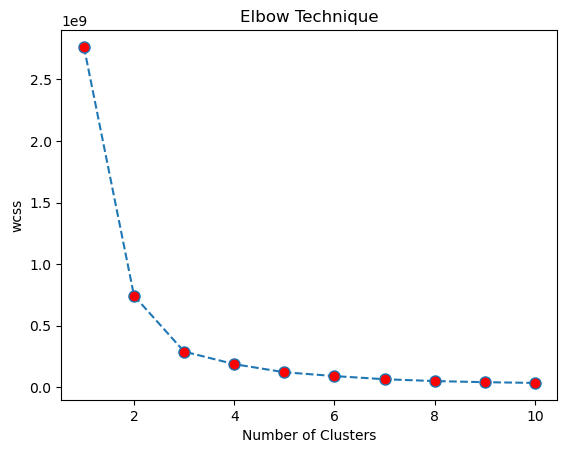

In [102]:
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = 'dashed', markerfacecolor = 'Red', markersize = 8)
plt.title('Elbow Technique')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show

In [103]:
model = KMeans(n_clusters = 4, random_state = 42)
model.fit(x)

KMeans(n_clusters=4, random_state=42)

## Evaluation Metrics

In [104]:
label = model.labels_
label

from sklearn.metrics import silhouette_score
ss = silhouette_score(x,label)
ss

0.6047941375375788

### Report
- If the **Silhouette score** is **positive** then we can say that the model is satisfied for the given data frame and the given sample is far away from the neighboring cluster.
- Since the **Silhouette score = 0.604** we have to improve it, so we proceeded to the next model.
- Another **drawback** of this method is the given data frame is **supervised** so KMeans Algorithm is **not satisfied**.

# 3) K-Nearest Neighbors

- KNN is **supervised** machine learning.
- It is used for both **regression** and **classification** problems.
- And also it will work for both **linear** and **non-linear** data.

## Model Creation

In [105]:
x = data.drop('Price', axis = 1)
x

,Airline,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,total_Stops
0,3,0,5,170,0,24,3,1,10,22,20,0
1,1,3,0,445,2,1,5,13,15,5,50,2
2,4,2,1,1140,2,9,6,4,25,9,25,2
3,3,3,0,325,1,12,5,23,30,18,5,1
4,3,0,5,285,1,1,3,21,35,16,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,150,0,9,4,22,25,19,55,0
10679,1,3,0,155,0,27,4,23,20,20,45,0
10680,4,0,2,180,0,27,4,11,20,8,20,0
10681,10,0,5,160,0,1,3,14,10,11,30,0


In [106]:
y = data.Price
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

In [107]:
data.Price.value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: Price, Length: 1870, dtype: int64

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [109]:
x_scaled

array([[0.27272727, 0.        , 1.        , ..., 0.95652174, 0.36363636,
        0.        ],
       [0.09090909, 0.75      , 0.        , ..., 0.2173913 , 0.90909091,
        0.5       ],
       [0.36363636, 0.5       , 0.2       , ..., 0.39130435, 0.45454545,
        0.5       ],
       ...,
       [0.36363636, 0.        , 0.4       , ..., 0.34782609, 0.36363636,
        0.        ],
       [0.90909091, 0.        , 1.        , ..., 0.47826087, 0.54545455,
        0.        ],
       [0.09090909, 0.5       , 0.2       , ..., 0.43478261, 1.        ,
        0.5       ]])

In [110]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 42)

In [111]:
x_train

array([[0.27272727, 0.5       , 0.2       , ..., 0.69565217, 0.        ,
        0.25      ],
       [0.72727273, 0.25      , 0.8       , ..., 0.34782609, 0.36363636,
        0.        ],
       [0.36363636, 0.75      , 0.        , ..., 0.7826087 , 1.        ,
        0.25      ],
       ...,
       [0.54545455, 0.5       , 0.2       , ..., 0.52173913, 0.90909091,
        0.25      ],
       [0.27272727, 0.        , 1.        , ..., 0.        , 0.72727273,
        0.        ],
       [0.36363636, 0.5       , 0.2       , ..., 0.56521739, 0.        ,
        0.25      ]])

In [112]:
y_train

752      5054
7431     3911
5478    13044
3445    14714
9380     8016
        ...  
5734    12242
5191    10844
5390     7670
860      6144
7270    10262
Name: Price, Length: 8012, dtype: int64

In [113]:
x_test

array([[0.36363636, 0.75      , 0.        , ..., 0.2173913 , 0.81818182,
        0.25      ],
       [0.18181818, 0.5       , 0.2       , ..., 0.43478261, 0.63636364,
        0.25      ],
       [0.36363636, 0.75      , 0.        , ..., 0.60869565, 0.09090909,
        0.25      ],
       ...,
       [0.27272727, 0.        , 0.4       , ..., 0.        , 0.45454545,
        0.        ],
       [0.54545455, 0.5       , 0.2       , ..., 0.73913043, 0.81818182,
        0.25      ],
       [0.09090909, 0.5       , 0.2       , ..., 0.30434783, 0.        ,
        0.25      ]])

In [114]:
y_test

6076    10844
3544     4959
7313    14781
5032     3858
2483    12898
        ...  
3022    13555
8417     7229
2605     3419
1392     5797
7855    15407
Name: Price, Length: 2671, dtype: int64

In [115]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors = 5)
KNN.fit(x_train, y_train)

KNeighborsRegressor()

In [116]:
y_pred = KNN.predict(x_test)

In [117]:
y_pred

array([13171.4,  5913.2, 12182.6, ...,  3523.8, 10789.6, 16656.6])

In [118]:
(y_test != y_pred).sum()

2583

In [119]:
len(y_test)

2671

In [120]:
(y_test != y_pred).sum()/len(y_test)

0.9670535380007488

In [121]:
ERROR_RATE = []

for i in range(1, 13):
    KNN = KNeighborsRegressor(i)
    KNN.fit(x_train, y_train)
    y_pred = KNN.predict(x_test)
    error_rate = (y_test != y_pred).sum()/len(y_test)
    ERROR_RATE.append(error_rate)

In [122]:
ERROR_RATE

[0.7079745413702733,
 0.868588543616623,
 0.9277424185698241,
 0.9543242231374017,
 0.9670535380007488,
 0.9745413702733059,
 0.9797828528640958,
 0.9853987270685136,
 0.9906402096593037,
 0.9932609509546986,
 0.9962560838637214,
 0.9970048670909771]

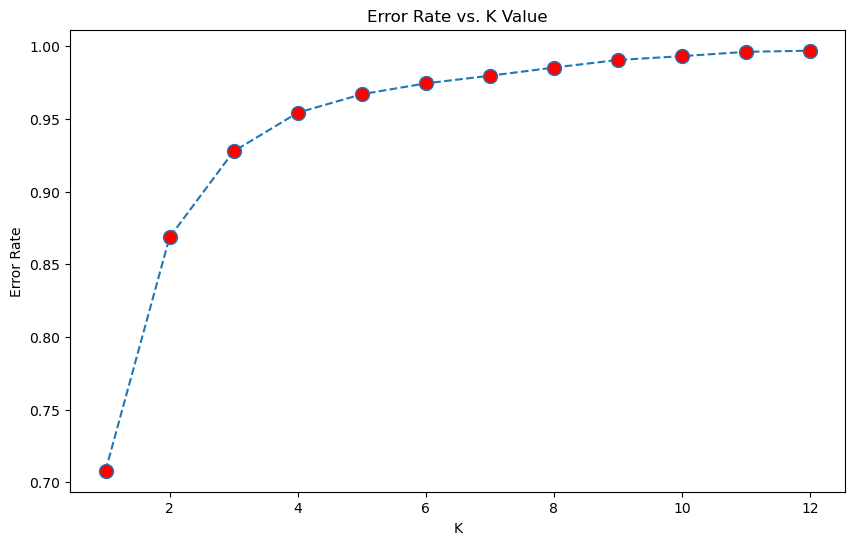

In [123]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 13), ERROR_RATE, marker = 'o', linestyle = 'dashed', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [124]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors = 5)
KNN.fit(x_train, y_train)

KNeighborsRegressor()

In [125]:
y_pred = KNN.predict(x_test)

## Model Evaluation

In [126]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [127]:
mse = mean_squared_error(y_test, y_pred)
mse

5593976.18027705

In [128]:
mae = mean_absolute_error(y_test, y_pred)
mae

1565.576338450019

In [129]:
import math 
rmse = math.sqrt(mse) #root mean squared error
rmse

2365.1588065660726

In [130]:
r2 = r2_score(y_test, y_pred)
r2

0.7261529591397464

In [131]:
x_test.shape

(2671, 12)

In [132]:
##calculation of adjusted r2 score
adj_r2 = 1-(1-r2)*(2671-1)/(2671-12-1)
adj_r2

0.7249166293841697

### Report
- The Residue by our model is less than the Residue by the dumb model so we get **Positive r2**, so it is considered to be a **Good Model**.
- The **r2 statistic** provides a measure of fit. Here the **r2 statistic =0.72**, it says that our model fits only **72%** of the total data set.
- To improve and fit the model **100%** , we apply the next model to the given data set.

# 5) Decision Tree and RandomForest

- We see the implementation of Decision tree and Random forest for the given data frame.
- **Random forest** is **supervised** machine learning made up of **Decision trees**.
- It can be used for both Regression and Classification problems.

## Model Creation

In [133]:
#creating independent variable
x = data.drop('Price', axis = 1)
x

,Airline,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,total_Stops
0,3,0,5,170,0,24,3,1,10,22,20,0
1,1,3,0,445,2,1,5,13,15,5,50,2
2,4,2,1,1140,2,9,6,4,25,9,25,2
3,3,3,0,325,1,12,5,23,30,18,5,1
4,3,0,5,285,1,1,3,21,35,16,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,150,0,9,4,22,25,19,55,0
10679,1,3,0,155,0,27,4,23,20,20,45,0
10680,4,0,2,180,0,27,4,11,20,8,20,0
10681,10,0,5,160,0,1,3,14,10,11,30,0


In [134]:
#creating dependent variable
y = data.Price
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

In [135]:
#preparing testing and training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [136]:
x_train

,Airline,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,total_Stops
752,3,2,1,300,1,27,5,21,0,16,0,1
7431,8,1,4,135,0,6,5,10,35,8,20,0
5478,4,3,0,1495,1,12,6,19,50,18,55,1
3445,4,2,1,1015,1,6,6,4,25,11,30,1
9380,4,0,2,180,0,18,6,10,10,7,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,4,2,1,1165,1,27,3,4,25,9,0,1
5191,4,3,0,400,1,9,5,20,45,14,5,1
5390,6,2,1,760,1,15,5,1,30,12,50,1
860,3,0,5,165,0,3,3,3,25,0,40,0


In [173]:
from sklearn.tree import DecisionTreeRegressor #importing decision tree from sklearn.tree
dt = DecisionTreeRegressor() #object creation for decision tree  
dt.fit(x_train, y_train) #training the model
y_hat = dt.predict(x_test) #prediction
y_hat #predicted values

array([14781.,  4959., 14781., ...,  3419.,  5797., 14882.])

In [174]:
y_train_predict = dt.predict(x_test)
y_train_predict

array([14781.,  4959., 14781., ...,  3419.,  5797., 14882.])

## Random Forest Implementation

## Model Creation

In [141]:
from sklearn.ensemble import RandomForestRegressor

In [175]:
from sklearn.ensemble import RandomForestRegressor #importing randomforest

rf_reg = RandomForestRegressor() #object creation
rf_reg.fit(x_train, y_train) #training the data

RandomForestRegressor()

In [176]:
y_pred = rf_reg.predict(x_test)
y_pred

array([13897.41666667,  5197.55      , 13140.29188095, ...,
        3610.91      ,  6267.8725    , 14120.57666667])

## Model Evaluation

In [177]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [178]:
mse = mean_squared_error(y_test, y_pred)
mse

4142803.124852259

In [179]:
mae = mean_absolute_error(y_test, y_pred)
mse

4142803.124852259

In [180]:
import math
rmse = math.sqrt(mse)
rmse

2035.3877087307615

In [182]:
r2 = r2_score(y_test, y_pred)
r2

0.7971935632104863

In [181]:
x_test.shape

(2671, 12)

In [183]:
adj_r2 = 1-((1-r2)*(2671-1))/(2671-12-1)
adj_r2

0.796277958529721

### Report
- As Decision Tree and Random Forest is applied for both regression and classification problem here we have used the regressor.
- The Residue by our model is less than the Residue by the dumb model so we get **Positive r2**, so it is considered to be a **Good Model**.
- The **r2 statistic** provides a measure of fit. Here the **r2 statistic =0.79**, it says that our model fits only **79%** of the total data set.
- To improve and fit the model **100%** , we apply the next model to the given data set.

# 6) Gradient Boosting and XGBoosting

- Gradient Boosting is a type of machine learning boosting the key role is to minimize the overall prediction error.
- XGBoost is a **Decision Tree** based ensemble Machine Learning algorithm that uses a **gradient boosting** framework. 
- And it has a wide range of applications as it can be applied to solve Regression and Classification problems.
- XGBoost is designed for **speed** and **performance**.

## Model Creation

In [143]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor() ## object creation
gbm.fit(x_train, y_train)

GradientBoostingRegressor()

In [144]:
y_gbm = gbm.predict(x_test)#predicting the price

In [145]:
y_gbm_train = gbm.predict(x_train)

In [146]:
## evaluatin the model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # to check model performance
r2_score(y_test, y_gbm) 

0.7739782519690412

In [147]:
r2_score(y_train, y_gbm_train)

0.7847711192715544

In [148]:
mse = mean_squared_error(y_train, y_gbm_train)
mse

4636232.927410526

In [149]:
mae = mean_absolute_error(y_train, y_gbm_train)
mae

1476.9302023337843

In [150]:
## Installing XGB library
!pip3 install xgboost

In [151]:
import xgboost 

In [152]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8012 entries, 752 to 7270
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Airline        8012 non-null   int32 
 1   Source         8012 non-null   int32 
 2   Destination    8012 non-null   int32 
 3   Duration       8012 non-null   int32 
 4   Total_Stops    8012 non-null   object
 5   Journey_date   8012 non-null   int32 
 6   Journey_month  8012 non-null   int32 
 7   Arrival_hour   8012 non-null   int32 
 8   Arrival_min    8012 non-null   int32 
 9   Dep_hour       8012 non-null   int32 
 10  Dep_min        8012 non-null   int32 
 11  total_Stops    8012 non-null   int32 
dtypes: int32(11), object(1)
memory usage: 469.5+ KB


In [153]:
x_train.Total_Stops.dtype

dtype('O')

In [154]:
x_train.Total_Stops = x_train.Total_Stops.astype('int32')   #since data is in object type

In [155]:
x_test.Total_Stops = x_test.Total_Stops.astype('int32')

In [156]:
x_train.Total_Stops.dtype

dtype('int32')

In [157]:
## model creation
from xgboost import XGBRegressor
xgb_r = XGBRegressor() 
xgb_r.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [158]:
y_hat = xgb_r.predict(x_test)
y_hat

array([12496.271 ,  5543.866 , 13539.839 , ...,  3496.8865,  7675.242 ,
       13639.034 ], dtype=float32)

In [159]:
y_hat_train = xgb_r.predict(x_train)
y_hat_train

array([ 6200.2783,  3787.5623, 10558.302 , ...,  7905.6284,  6459.5605,
       11201.553 ], dtype=float32)

In [160]:
r2_score(y_train,y_hat_train)

0.9401017247647854

In [161]:
r2_score(y_test,y_hat)

0.8275189299605745

## Hyperparameter Tuning

In [162]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

                               
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

In [163]:
XGB = XGBRegressor(random_state = 42, verbosity = 0, silent = 0)

In [164]:
rcv = RandomizedSearchCV(estimator = XGB, scoring = 'f1', param_distributions = param_grid, n_iter = 100, cv = 3, 
                               verbose = 2, random_state = 42, n_jobs = -1)

In [165]:
rcv.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                                  102.4, 200],
                                        'lea

In [166]:
cv_best_params = rcv.best_params_ 
print(f"Best paramters: {cv_best_params})")

Best paramters: {'reg_lambda': 1.6, 'reg_alpha': 12.8, 'n_estimators': 50, 'max_depth': 8, 'learning_rate': 0.6, 'gamma': 0})


In [167]:
XGB2 = XGBRegressor(reg_lambda = 1.6, reg_alpha= 12.8, n_estimators=50, max_depth=8, learning_rate=0.6, gamma=0)

In [168]:
XGB2.fit(x_train, y_train)#training 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.6, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [169]:
y_predict = XGB2.predict(x_test)#testing

## Model Evaluation

In [170]:
r2_score(y_predict,y_test)

0.7727564760101159

In [171]:
y_predict_train = XGB2.predict(x_train)#testing
r2_train = r2_score(y_predict_train, y_train)#checking performance

In [172]:
r2_train

0.9611417041966112

### Report
- The Residue by our model is less than the Residue by the dumb model so we get **Positive r2**, so it is considered to be a **Good Model**.
- The **r2 statistic** provides a measure of fit. Here the **r2 statistic =0.96**, it says that our model fits only **96%** of the total data set.

# Conclusion

By applying multiple models to the given data we can conclude that **XGBoosting** is the best model for production.